## Task 1

In [1]:
import array
import numpy as np
import matplotlib.pyplot as plt
import h5py


binfpath="/fs/lustre/cita/hqchen/data/z-ifrit-a=0.1401.bin"


def loadfile(binfpath):
    '''
    A function to load data from the CROC simulation box. 
    Parameters
    -----------
    binfpath: String, provides the path to the .bin file
    
    Returns
    -----------
    xHI: Numpy array of shape (N, N, N) containing the neutral hydrogen fraction at each cell in the simultion.
    delta: Numpy array of shape (N, N, N) containing the density contrast at each cell in the simulation.
    T: Numpy array of shape (N, N, N) containing the temperature at each of the cells in the simulation. 
    '''
    
    with open(binfpath,'rb') as f:
        binarydata=f.read()
    lllen=8; flen=4; ilen=4 
    N=1024
    
    firstfield=lllen*2+3*ilen
    nextfield=firstfield
    xHI=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    xHI=np.reshape(xHI,(N,N,N),order='F')

    nextfield+=lllen+N**3*flen
    delta=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    delta=np.reshape(delta,(N,N,N),order='F')

    nextfield+=lllen+N**3*flen
    T=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    T=np.reshape(T,(N,N,N),order='F')
    
    return xHI, delta, T

xHI, delta, T = loadfile(binfpath)


/tmp/ipykernel_1291246/591149048.py:8: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_1291246/591149048.py:14: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

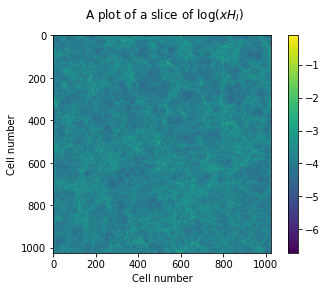

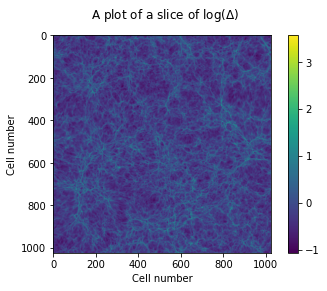

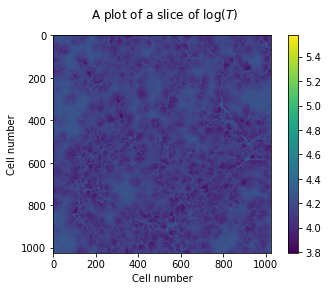

In [2]:
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")

## Task 2

In [3]:
import astropy

In [4]:
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u

def mean_gas_density(z):
    '''
    A function to find the mean gas density at some redshift z. 
    Parameters
    ----------
    z: Float, represents the redshift
    Returns
    ----------
    mean_gas_density: Astropy quantity object, represents the mean gas density at the given redshift z.
    '''
    crt_dns = cosmo.critical_density(z)
    mean_gas_density = crt_dns*cosmo.Ob(z)
    return mean_gas_density
    
mean_gas_density_6 = mean_gas_density(6)
    
print(mean_gas_density_6)

1.432778841086186e-28 g / cm3


## Task 3

In [5]:
from astropy.constants import m_p

def calc_dT(mean_gas_density, xHI):
    '''
    A function to calculate the Lyman alpha optical depth
    Parameters
    ----------
    mean_gas_density: Astropy quantity object, represents the mean_gas_density at the desired redshift.
    xHI: Numpy array (N, N, N), represents the neutral hydrogen fraction in the simulation.
    
    Returns
    ---------
    
    dT: Numpy array of shape (N, N, N), represents the lyman alpha optical depth at each cell in the simulation.
    '''
    p = m_p.to(u.g)
    sigma  = 4.48e-18*u.cm**2
    nH =  (0.76*mean_gas_density/p)
    nHI = xHI*nH
    nHI = nHI.astype('float128')
    cml = (40/0.68)/1024*u.Mpc 
    ds = cml*(1/(1+6))
    ds = ds.to(u.cm)
    dT = sigma * nHI * ds
    return dT, nHI, nH

dT, nHI, nH = calc_dT(mean_gas_density_6, xHI)


In [6]:
print(np.mean(nHI))

3.651128626456264e-08 1 / cm3


## Task 4

In [7]:
from numpy import float128

new_tau = dT[0][0]
percent = float128(10)
percent = float128(np.exp(-new_tau)*100)


## Task 5

In [8]:
halofpath="/fs/lustre/cita/hqchen/data/hlist_0.14005.list"
def get_halo_mass(halofpath):
    ''' 
    A function to retrieve dark matter halo masses from a text file.
    Parameters
    ----------
    halofpath: string, gives the file path for the text file containing halo data
    Returns:
    halomass: Numpy array of shape (N,) containing halo masses
    '''
    halodata = np.loadtxt(halofpath, skiprows = 63) 
    halomass = halodata[:, 10]
    return halomass
halomass = get_halo_mass(halofpath)

def get_halo_vir_radius(halofpath): 
    ''' 
    A function to retrieve dark matter halo masses from a text file.
    Parameters
    ----------
    halofpath: string, gives the file path for the text file containing halo data
    Returns:
    halomass: Numpy array of shape (N,) containing halo masses
    '''
    halodata = np.loadtxt(halofpath, skiprows = 63) 
    vir_radius = halodata[:, 11]
    return vir_radius
vir_radius = get_halo_vir_radius(halofpath)

[]

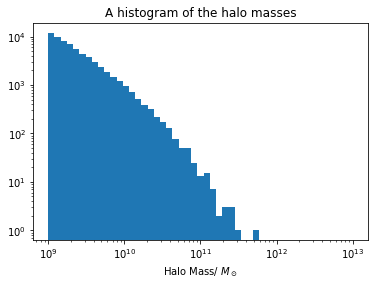

In [13]:
plt.hist(halomass, bins = np.logspace(start =np.log10(10**9), stop = np.log10(10**13)))
plt.gca().set_xscale("log")
plt.title("A histogram of the halo masses")
plt.xlabel("Halo Mass/ $M_\odot$")
plt.loglog()

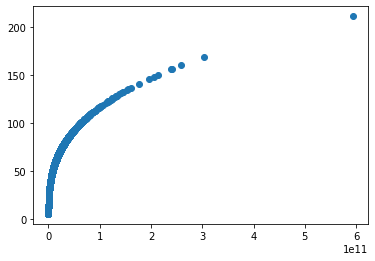

In [14]:
plt.scatter(halomass, vir_radius)

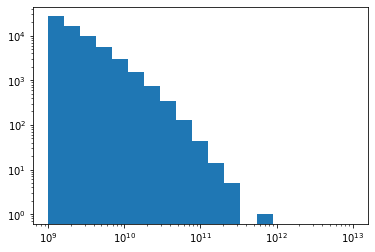

In [15]:
plt.hist(halomass,bins=np.logspace(9,13,20))
plt.xscale("log")
plt.yscale("log")

## Task 6

/tmp/ipykernel_3106608/2615065892.py:55: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_3106608/2615065892.py:63: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

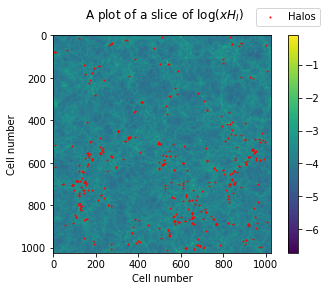

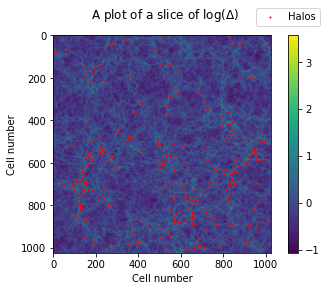

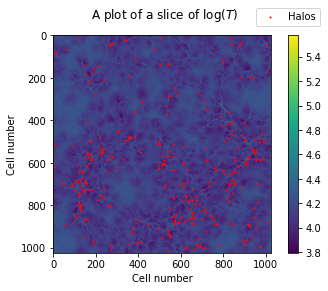

In [9]:
m = 1024*0.9839115/(40)

def get_halo_pos(halofpath):
    '''
    A function to get the position of halo data in cMpc in the simulation box. 
    Parameters
    ----------
    halofpath: string, containing th file path to the halo 
    Returns
    ----------
    x: Numpy array of shape (N,), containing the x-coordinate in cMPc
    y: Numpy array of shape (N,), containing the y-coordinate in cMPc
    z: Numpy array of shape (N,), containing the z-coordinate in cMPc
    '''
    halodata = np.loadtxt(halofpath, skiprows = 63) 
    x, y, z = np.array(halodata[:, 17]), np.array(halodata[:, 18]), np.array(halodata[:, 19])
    return x, y, z

x, y, z = get_halo_pos(halofpath)

def cMpc_to_pix(u):
    '''
    A function to convert a coordinate from cMpc to pixels
    Parameters
    ----------
    u: Float, contains the information about the uth coordinate in cMpc
    Returns
    ---------
    v: Float, the uth coordinate in pixels
    '''
    
    m = 1024*0.9839115/(40)
    v = m*u
    return v

x, y, z = cMpc_to_pix(x), cMpc_to_pix(y), cMpc_to_pix(z)


x_int = x.astype(int)
indices = np.where(x_int ==0)
y_int = y[indices]
z_int = z[indices]


fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
ax1.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax1.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))

fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
ax2.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax2.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
ax3.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax3.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")



/tmp/ipykernel_3106608/2163247988.py:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

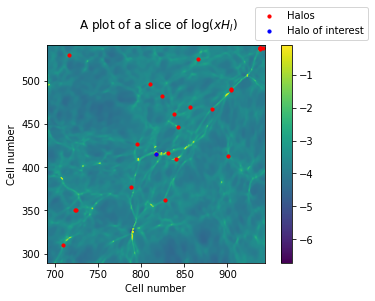

In [10]:

pointz, pointy = z[indices[0][0]], y[indices[0][0]]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-5*m, pointz + 5*m])
ax4.set_ylim([pointy - 5*m, pointy+5*m])
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.20))
fig4.colorbar(im1)

fig4.suptitle("A plot of a slice of $\log(xH_I)$")


## Task 7

/tmp/ipykernel_3106608/2979926674.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

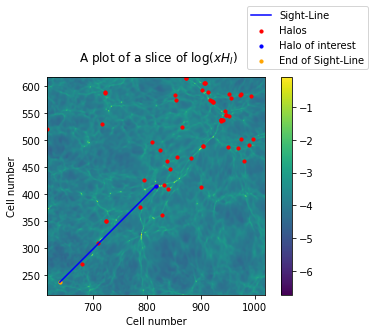

In [11]:
from sympy.solvers import solve
from sympy import Symbol

length = 10*m

pointsz = [pointz, pointz - length/np.sqrt(2)]
pointsy = [pointy, pointy - length/np.sqrt(2) ]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-8*m, pointz + 8*m])
ax4.set_ylim([pointy - 8*m, pointy+8*m])
ax4.plot(pointsz, pointsy, color = 'blue', label = 'Sight-Line')
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.scatter(pointz - length/np.sqrt(2), pointy - length/np.sqrt(2), color = 'orange', s=10, label = 'End of Sight-Line')
ax4.legend(loc = 'upper right', bbox_to_anchor = ( 1.5, 1.35))
fig4.colorbar(im1)
fig4.suptitle("A plot of a slice of $\log(xH_I)$")


Text(0, 0.5, 'Density contrast')

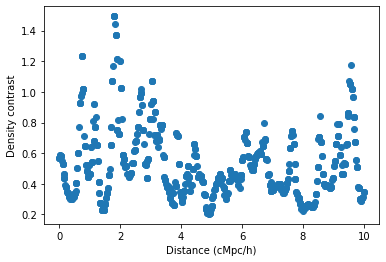

In [12]:
t = np.linspace(0, 1, 1000)



sight = (np.array((-length/np.sqrt(2), -length/np.sqrt(2)))) * t[:, None] + np.array((pointz, pointy))
#for i in range(len(t)):
#    sight[i] = t[i]*(np.array((-length/np.sqrt(2), -length/np.sqrt(2)))) + np.array((pointz, pointy))

sight = np.around(sight)
sight = sight.astype(int)

density = np.zeros(len(t))


for i in range(len(t)):
    density[i] = delta[0][sight[i][0]][sight[i][1]]

distance = np.linalg.norm((sight- np.array((pointz, pointy))), axis = 1)


distance = distance/m

plt.scatter(distance, density)
plt.xlabel('Distance (cMpc/h)' )
plt.ylabel('Density contrast')

## Analyzing Lyman Limit Systems

In [22]:
t = (np.linspace(0, 1, 1000))

diff = np.zeros(1000)
for i in range (len(t)-1):
    diff[i] = t[i+1]-t[i]
    
print(np.sqrt(length)*np.sqrt(direction[0]**2*(diff[0]**2) + direction[1]**2*(diff[30]**2)+direction[2]**2*(diff[30]**2)))


print(np.linalg.norm(sight[2]-sight[1]))
print((sight[2]-start[19]))
print(sight[1]-start[19])
print(np.linalg.norm(sight[2]-start[19] - (sight[1]-start[19])))


print(np.linalg.norm((t[2]*length*direction) - (t[1]*length*direction)))

print(((t[2]*length*direction)))

NameError: name 'direction' is not defined

In [13]:
#Function to choose a Lymann Limit system given a LOS 
m = 1024*0.9839115/(40)
length = 50*m

def lyman(start, direction):
    ''' 
    A function to select a Lyman Limit System given a start point and an end point
    Parameters
    ----------
    start : Numpy array of shape (1, 1, 1), contains the position of the start point of the sight-line
    direction: Numpy array of shape (1, 1, 1), represents the vector which decides the direction in which the sight-line will be drawn
    
    Returns
    ---------
    LLS: Numpy array of shape (N, 1, 1, 1), contains the list of 'true' positions (in pixels) of LLS
    LLS_trunc: Numpy array of shape (N, 1, 1, 1), contains the list of positions (in pixels) of LLS that wrap around so that they are contained within the CROC simulation
    sight: Numpy array of shape (N, 1, 1, 1), contains the list of 'true' positions (in pixels) of the cells in the sight line
    new_sight: Numpy array of shape (N, 1, 1, 1), contains the list of positions (in pixels) of cells that wrap around so that they are contained within the CROC simulation
    '''
    t = np.linspace(0, 1, 1000)
    sight, new_sight =  start + t[:, None]*(length*direction), start + t[:, None]*(length*direction)
    LLS = np.array([])
    LLS_trunc = np.array([])
   

    for i in range(len(t)):
        while new_sight[i][0]<0:
            new_sight[i][0] = 1023 + new_sight[i][0]
        
        while new_sight[i][1]<0:
            new_sight[i][1] = 1023 + new_sight[i][1]
            
        while new_sight[i][2]<0:
            new_sight[i][2] = 1023 + new_sight[i][2]
            
   
    
        while new_sight[i][0]>1023:
            new_sight[i][0] = new_sight[i][0] - 1023
        
        while new_sight[i][1]>1023:
            new_sight[i][1] = new_sight[i][1] - 1023
        
        while new_sight[i][2]>1023:
            new_sight[i][2] = new_sight[i][2] - 1023
            
       
    sight = np.around(sight)
    sight = sight.astype(int)
    new_sight = np.around(new_sight)
    new_sight = new_sight.astype(int)
    density = np.zeros(len(t))
   
    for i in range(len(t)):
        density[i] = delta[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]]
        if density[i]>10**2 and sight[i].any()!= LLS.any():
            LLS = np.append(LLS, np.ndarray.tolist(sight[i]))
            LLS_trunc = np.append(LLS_trunc, np.ndarray.tolist(new_sight[i]))
    return LLS, LLS_trunc, sight, new_sight
    

In [14]:
from scipy.signal import argrelextrema

In [15]:

ix = np.random.randint(0, len(x)-1)
iy = np.random.randint(0, len(y)-1)
iz = np.random.randint(0, len(z)-1)

start = np.array((x[ix], y[iy], z[iz]))
print(start)

[385.16586847 747.77374753 869.40674478]


(0.0, 400.0)

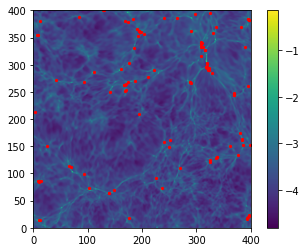

In [16]:
#Checking if the sampling of the start point is correct

x_int = np.asarray(x, dtype = 'int')

indices = np.where(x_int ==x_int[ix])
y_int = y[indices]
z_int = z[indices]


plt.scatter(z_int, y_int, s = 5, color = 'red')
plt.imshow(np.log10(xHI[x_int[ix]]))
plt.colorbar()
plt.ylim([0, 400])
plt.xlim([0, 400])


In [17]:
def n_largest_halos(n, x, y, z, halomass):
    '''
    A function to find halos with the n largest masses. 
    Parameters
    ----------
    n: integer, represents the number of halos to find
    x: numpy array of shape (N,), contains the x-coordinates (in pixel units) of the dark matter halos
    y: numpy array of shape (N,), contains the y-coordinates (in pixel units) of the dark matter halos
    z: numpy array of shape (N,), contains the z-coordinates (in pixel units) of the dark matter halos
    halomass: numpy array of shape (N,), contains the masses of the dark matter halos in solar masses 
    Returns
    ---------
    start: numpy array of shape (n, 1, 1, 1) contains the positions of the n largest halos in pixel units. 
    '''
    ind  = np.argpartition(halomass, -20)[-20:]

    startx, starty, startz = x[ind], y[ind], z[ind]

    start = np.dstack((startx, starty, startz))[0]
    
    return start

start = n_largest_halos(20, x, y, z, halomass)


In [147]:
h5f.close()


In [186]:
from sympy import *


def get_LOS_data(halo_pos, M):
    '''
    A function to obtain data on the LOS.
    Parameters
    ----------
    halo_pos: (N, 1, 1, 1), contains the positions of N halos in the simulation in pixel units. 
    m: integer, represents the number of sight-lines to be drawn from a single dark matter halo
    Returns
    ----------
    dns_max: numpy array of shape (P, ) represents the maxima in the density contrast along the LOSs
    dist_max: numpy array of shape (P, ) represents the distance from the density contrast maxima to the dark matter halo in cMpc
    lyman_dist: represents the distance of LLS to the halo in cMpc
    no_LOS: numpy array of shape (5, ) represents the number of LOS that have a density contrast greater than 100 at bins of 10 cMpc
    '''
    
    
    dns_max = [] 
    dist_max = []
    lyman_dist = []
    no_LOS = np.zeros(5)
    
    m = 1024*0.9839115/(40)

    count = 0
    
    h5f = h5py.File("/fs/lustre/cita/akhadir/Data", 'w')

    for count in range(len(halo_pos)):
        output = []
        output_true = []

        

        for i in range(M):
            phi = np.random.uniform(0,2*pi)
            costheta = np.random.uniform(-1,1)
            theta = acos(costheta)

            posx =  sin(theta) * cos(phi)
            posy =  sin(theta) * sin(phi)
            posz =  cos(theta)

            direction = np.asarray((posx, posy, posz), dtype ='float64')

            lls_true, lls_trunc, sight, new_sight = lyman(halo_pos[count], direction)
            
            truename = "LOS_Data/halo_" + str(count) + "/lls_true" + str(i)
            truncname = "LOS_Data/halo_" + str(count) + "/lls_trunc" + str(i)
            str_sight = "LOS_Data/halo_" + str(count) + "/sight" + str(i)
            str_new_sight = "LOS_Data/halo_" + str(count) + "/new_sight" + str(i)
            
            h5f.create_dataset(truename, data = lls_true)
            h5f.create_dataset(truncname, data = lls_trunc)
            h5f.create_dataset(str_sight, data = sight)
            h5f.create_dataset(str_new_sight, data = new_sight)

            if lls_true.size > 0:
                output.append(np.ndarray.tolist(lls_trunc))
                output_true.append(np.ndarray.tolist(lls_true))
            #Code for finding the local density maxima on a sightline

            d, dns_sight = np.zeros(len(sight)), np.zeros(len(sight)) 

            d = np.linalg.norm((sight - halo_pos[count]), axis = 1)
            d = d/m
            for j in range(len(sight)):
                dns_sight[j] = delta[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
            dns_sight = dns_sight[np.where(d>1)]
            d = d[np.where(d>1)]
            sight_max = argrelextrema(dns_sight, np.greater)
            max_val, d_max = [dns_sight[k] for k in sight_max], [d[k] for k in sight_max]
            dns_max = np.append(dns_max, np.array(max_val))
            dist_max = np.append(dist_max, np.array(d_max))
            
            # Finding the percentage of sight-lines that have LLS at a given distance 
            dns_dist = d[np.where(dns_sight>100)]
            for l in range(len(dns_dist)):
                if dns_dist[l] > 40:
                    no_LOS[4] += 1
                elif dns_dist[l] > 30:
                    no_LOS[3] += 1
                elif dns_dist[l] > 20:
                    no_LOS[2] += 1
                elif dns_dist[l] > 10:
                    no_LOS[1] += 1
                else:
                    no_LOS[0] += 1

        output.sort()
        output_true.sort()
        newout = np.unique(output, axis = 0)
        newout_true = np.unique(output_true, axis = 0)
        newout = np.asarray(newout, dtype = 'int')

        distance = np.linalg.norm((newout_true - halo_pos[count]), axis = 1) 

        #MUST RECHECK THIS DISTANCE STUFF
        distance = distance/m

        lyman_dist = np.append(lyman_dist, np.array(distance))
        
        count += 1 
        
    h5f.create_dataset("/LOS_Data/Dns_Max", data = dns_max)
    h5f.create_dataset("/LOS_Data/Dns_Max_Dist", data = dist_max)
    h5f.create_dataset("/LOS_Data/LLS_Dist", data = lyman_dist)
    h5f.create_dataset("/LOS_Data/No_LOS", data = no_LOS)
    h5f.close()
        
    return dns_max, dist_max, lyman_dist, no_LOS
    
dns_max, dist_max, lyman_dist, no_LOS = get_LOS_data(start, 50)  

[55. 21. 30. 26. 22.]


<Figure size 432x288 with 0 Axes>

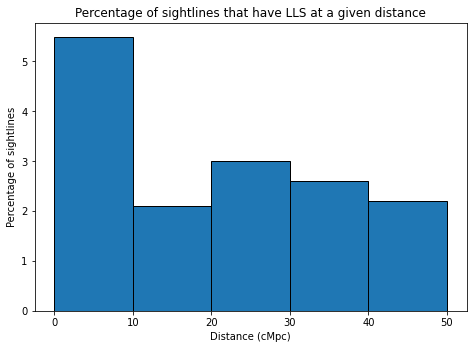

<Figure size 432x288 with 0 Axes>

In [187]:
print(no_LOS)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
lengths = [0, 10, 20, 30, 40]
ax.bar(lengths, (no_LOS/(50*20))*100, width = 10, ec = 'k', align= 'edge')
plt.xlabel('Distance (cMpc)')
plt.ylabel('Percentage of sightlines')
plt.title('Percentage of sightlines that have LLS at a given distance')
plt.figure()

In [185]:
h5f = h5py.File("/fs/lustre/cita/akhadir/Data", 'r')

a = h5f["/LOS_Data"]
a.keys()
subgrp = a["halo_1/lls_true0"][:]
h5f.close()


[946. 261. 708.]


In [ ]:
#These are for a single halo
'''
output.sort()
output_true.sort()
newout = np.unique(output, axis = 0)
newout_true = np.unique(output_true, axis = 0)
newout = np.asarray(newout, dtype = 'int')

print(newout) 
'''


In [ ]:
#These are for a single halo
'''
from matplotlib.pyplot import cm
x = np.unique(newout[:,0], axis= 0)

color = iter(cm.viridis(np.linspace(0, 1, len(newout))))
for i in range(len(newout)):
    count = 1
    if i>0 and newout[i][0] == newout[i-1][0]:
        count = count + 1 
    c = next(color)
    y = list(filter(lambda x: x[0] == newout[i][0], newout))
    for point in y:
        plt.scatter(point[2], point[1], s = 5, color = 'red')
        plt.scatter(start[3], start[2], s= 10, color = 'red')
    if count == 1:
        plt.imshow(np.log10(delta[newout[i][0]]))
        plt.title('A slice at x = ' + str(newout[i][0]))
        plt.colorbar()
        plt.show()
print(x)
'''


In [ ]:
#These are for a single halo
'''
#Now, we will plot the number of LLS a particular distance from the quasar
distance = np.linalg.norm((newout_true-start), axis = 1)
#MUST RECHECK THIS DISTANCE STUFF
distance = distance/m

print(distance)
'''


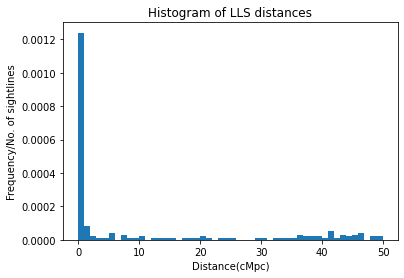

In [155]:

(counts, bins) = np.histogram(lyman_dist, bins =50)


factor = 1/(5000*20) 

plt.hist(bins[:-1], bins, weights=factor*counts)
plt.xlabel('Distance(cMpc)')
plt.ylabel('Frequency/No. of sightlines')
plt.title('Histogram of LLS distances')
plt.show()



Text(0.5, 1.0, 'Maximum density contrast vs. distance')

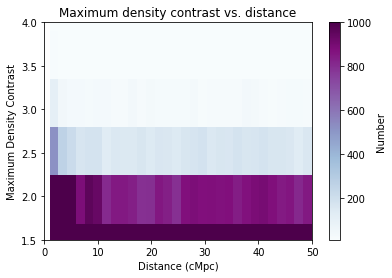

In [327]:
import matplotlib
#Now we will plot a histogram of the local maxima of the density contrast, along with the distance at which they occur

 
plt.hist2d(dist_max, np.log10(dns_max), bins = (30, 10), cmap=plt.cm.BuPu,vmin=10,vmax=1000)#, norm=matplotlib.colors.LogNorm())
plt.colorbar(label = 'Number')


plt.xlim([0, 50])
plt.ylim([1.5, 4])

plt.xlabel('Distance (cMpc)')
plt.ylabel('Maximum Density Contrast')
plt.title('Maximum density contrast vs. distance')


In [ ]:
#Plotting the density contrast and the neutral hydrogen fraction for some sight-lines

for startpoint in start:

    for i in range(10):
        direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
        direction = direction/(np.linalg.norm(direction))
        lls, lls_trunc, sight, new_sight = lyman(startpoint, direction)
        #Code for finding the local density maxima on a sightline
        xHI_sight, dns_sight = np.zeros(len(sight)), np.zeros(len(sight)) 
        d = np.linalg.norm((sight - startpoint), axis = 1)
        d = d/m
        for j in range(len(sight)):
            dns_sight[j] = delta[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
            xHI_sight[j] = xHI[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
        fig, ax = plt.subplots()   
        ax2 = ax.twinx()
        ax.plot(d, dns_sight, color = 'blue')
        ax2.plot(d, xHI_sight, color='red')
        ax.axhline(y = np.mean(dns_sight), color = 'blue', ls ='--')
        ax2.axhline(y= np.mean(xHI_sight), color ='red', ls ='--')

        ax.set_yscale('log')
        ax.set_xlabel('Distance(cMpc)')
        ax.set_ylabel('$\Delta_g$', color = 'blue')
        ax.set_xlim([1, 10])
        ax2.set_yscale('log')
        ax2.set_ylabel('$x$HI', color = 'red')
        plt.show()



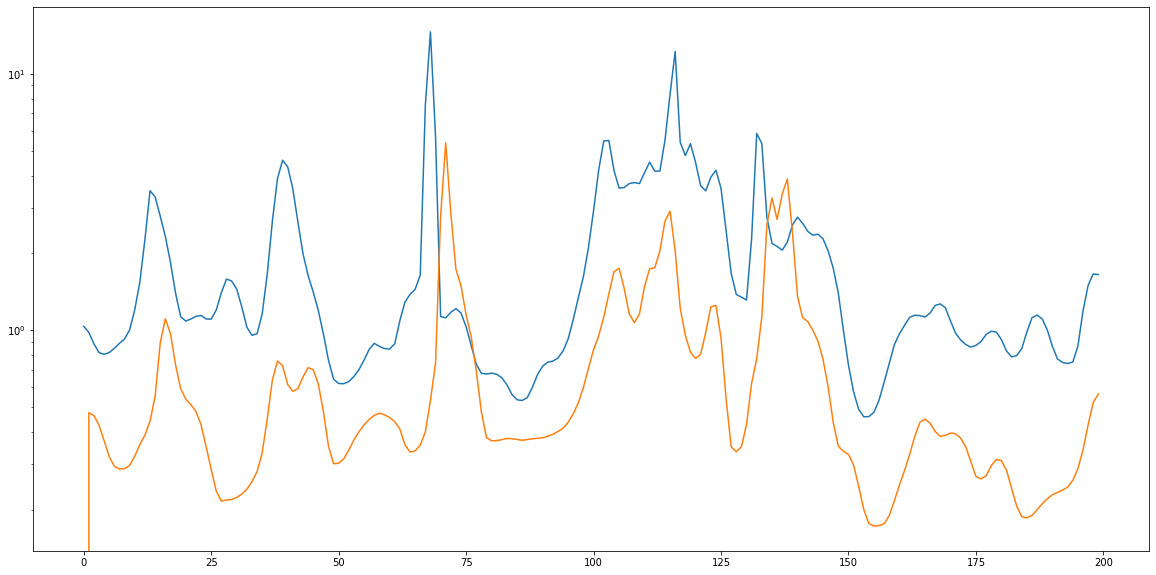

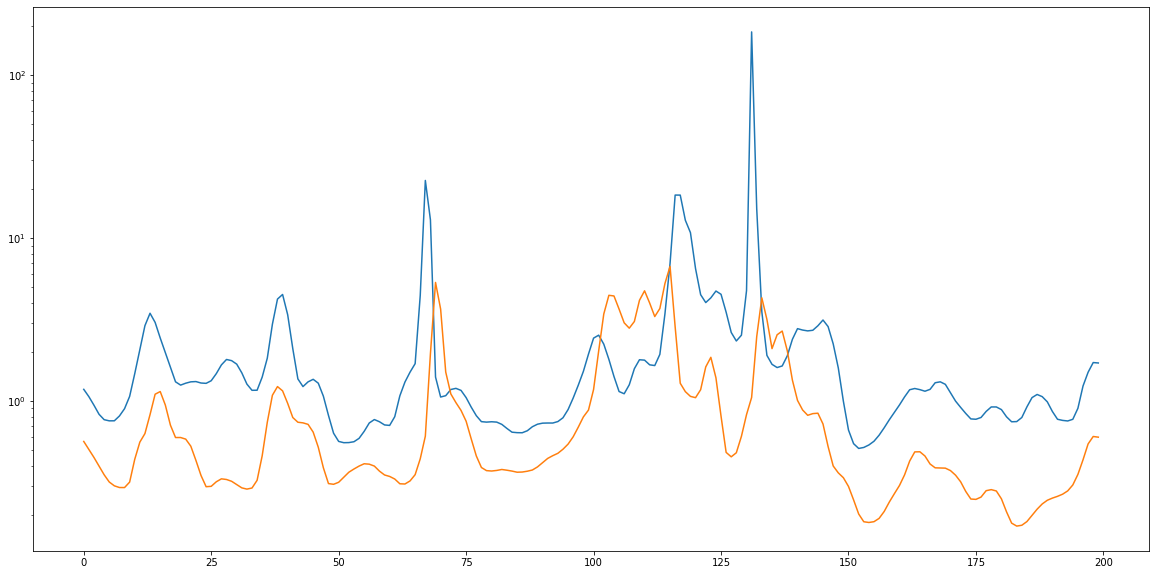

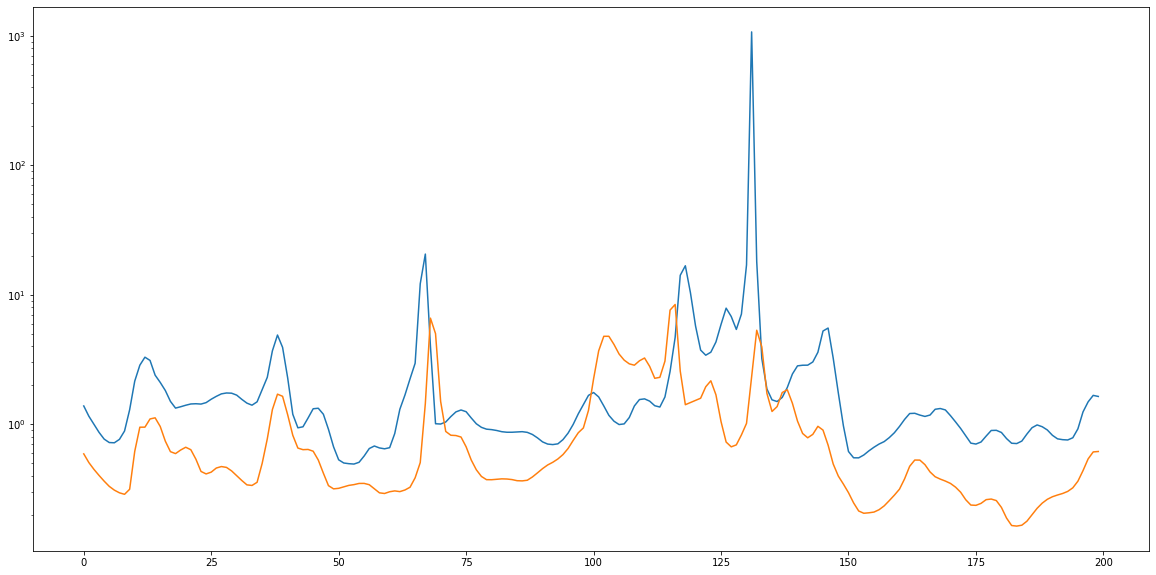

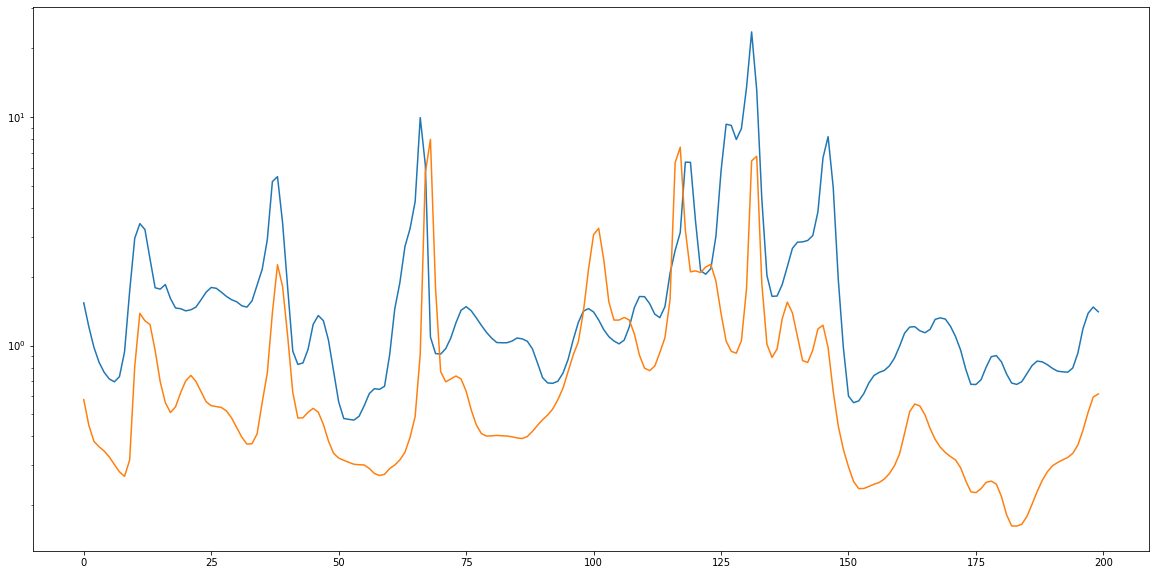

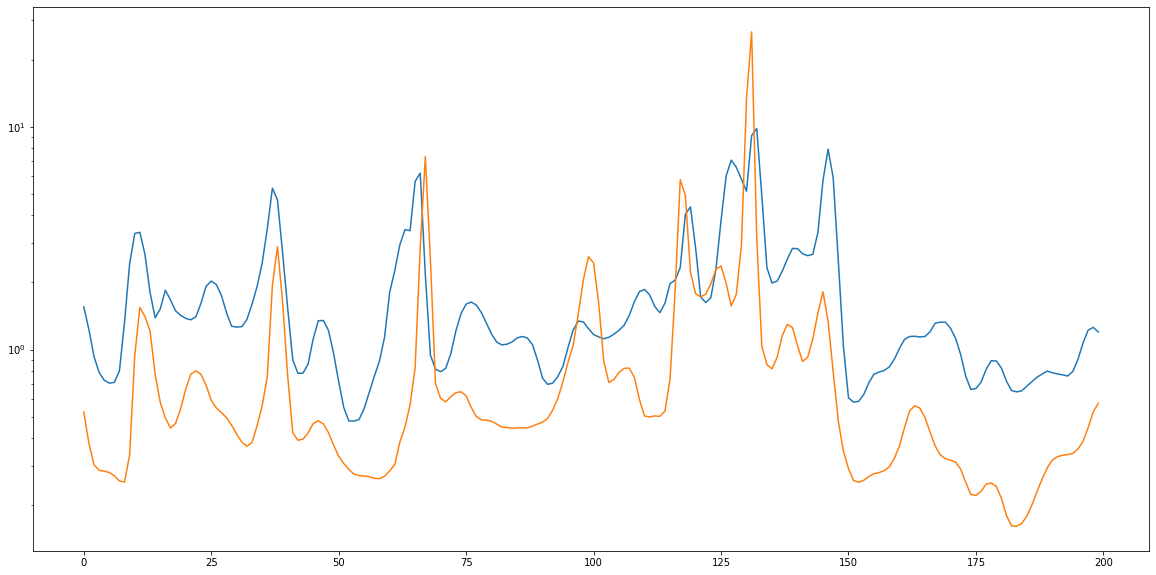

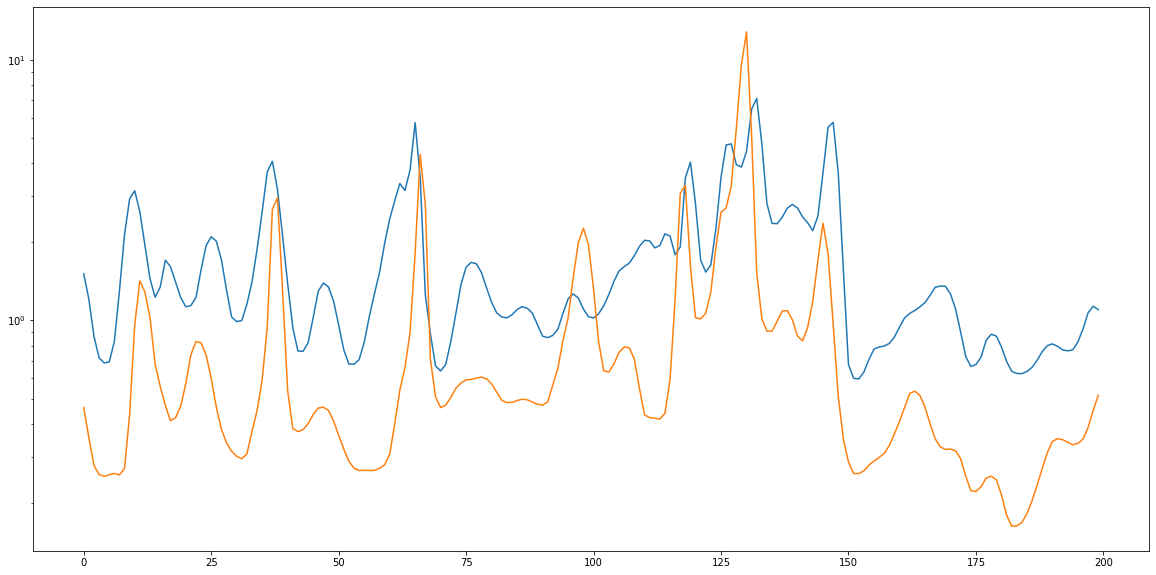

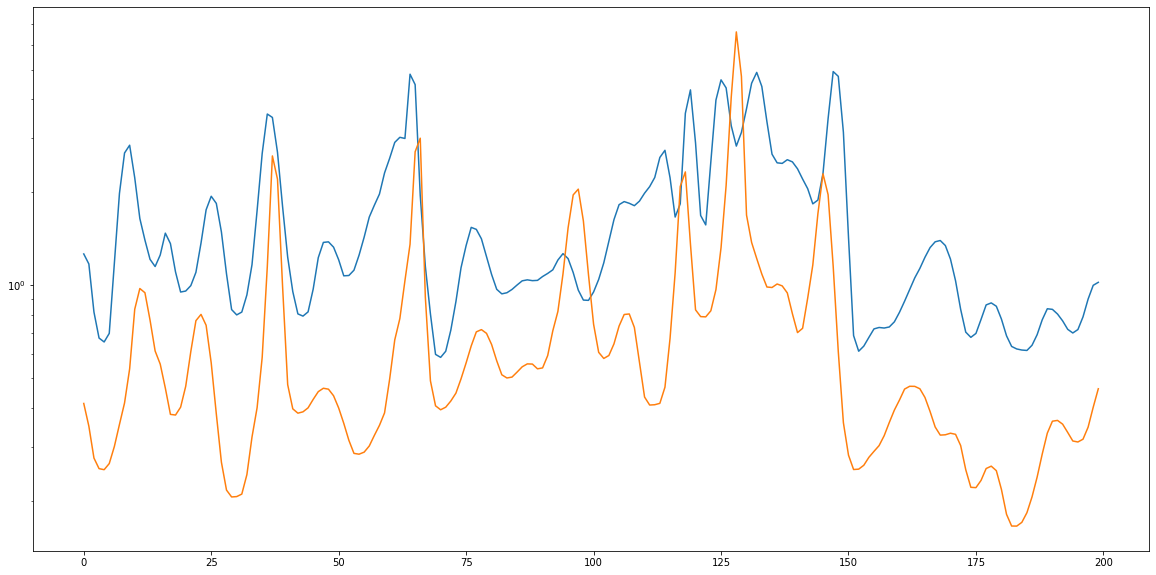

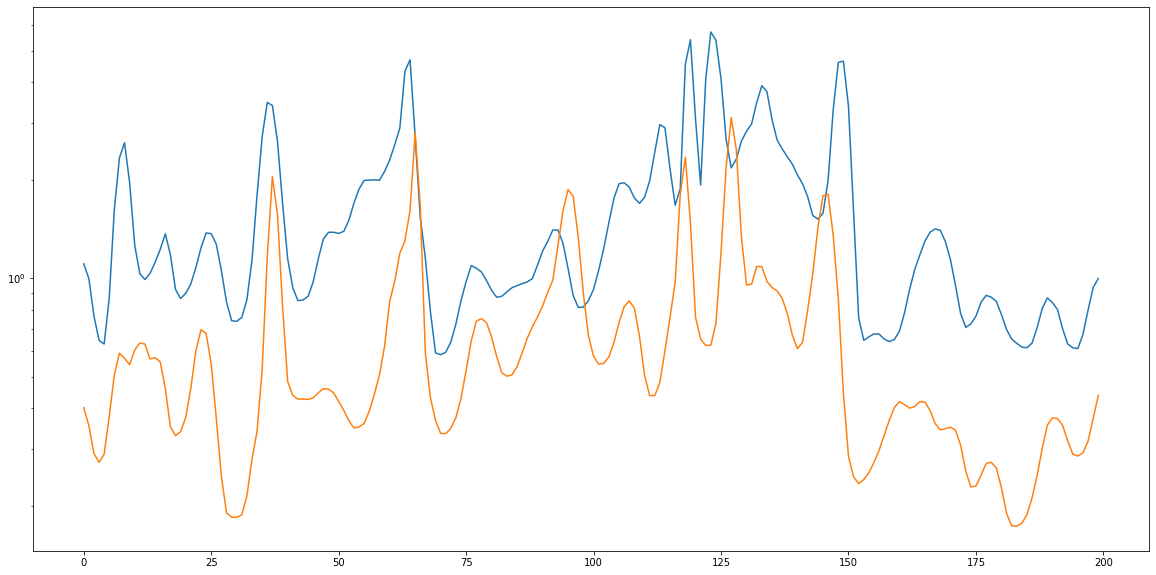

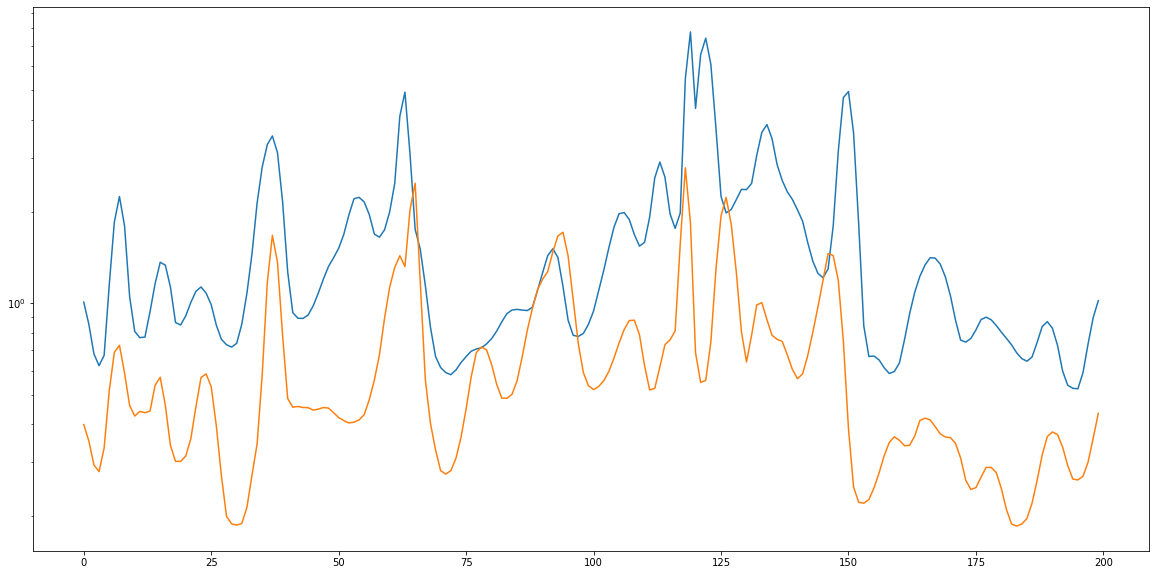

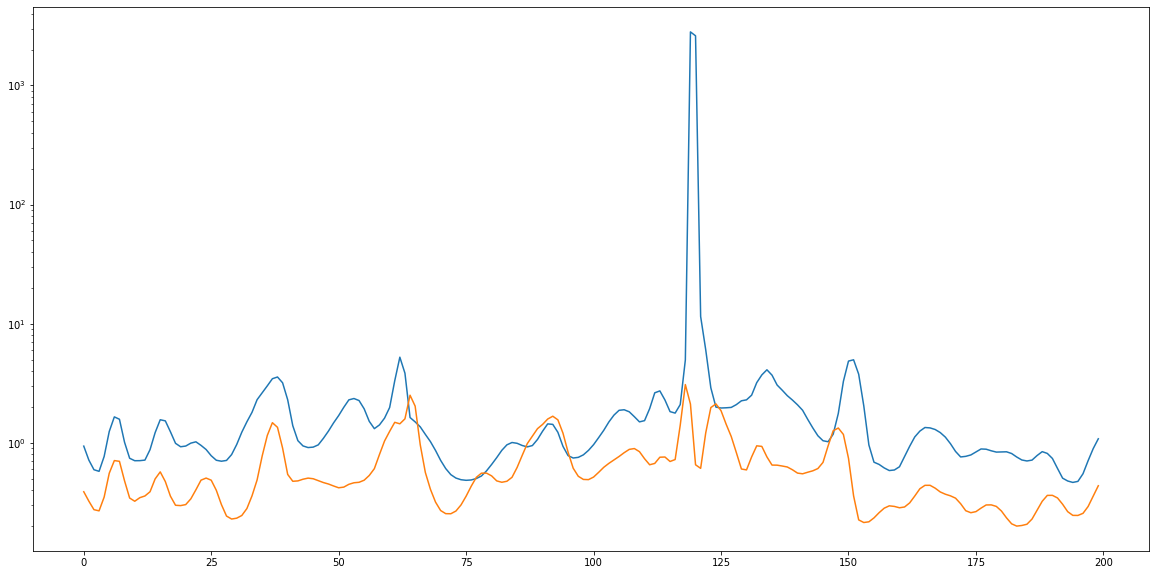

In [30]:
for i in range(10):
    plt.figure(figsize =(20, 10))
    plt.plot(xHI[0, i, :200]*10**4)
    plt.plot(delta[0, i, :200])
    plt.yscale('log')

## Solving the photoionization equation

In [6]:
#Importing the relevant modules. 
from sympy import * 
from scipy.integrate import quad

In [7]:

alpha_nu_red = -0.61
alpha_nu_blue = -1.7

M1450 = -26.4 #Assuming that the quasar has this absolute magnitude.


f_nu=lambda mAB: 10**(-(mAB+48.6)/2.5)
pc2cm=3.086e+18
MagAB_to_Lnu=lambda MagAB: 4*np.pi*(10*pc2cm)**2*f_nu(MagAB) # in unit erg s^-1 Hz^-1
lght=2.99792458e10
nuHz_to_lambdaAA=lambda nuHz:1e8*lght/nuHz
lambdaAA_to_nuHz=lambda lambdaAA: lght/(1e-8*lambdaAA)

nu1450=lambdaAA_to_nuHz(1450)
MagAB_to_nuLnu=lambda MagAB:nu1450*MagAB_to_Lnu(MagAB)
MagAB_to_Liso =lambda MagAB:10**(4.74+0.91*np.log10(MagAB_to_nuLnu(MagAB)))


nu912=lambdaAA_to_nuHz(912)
nu_lo=lambdaAA_to_nuHz(10000) #1 mu m
nu_hi=lambdaAA_to_nuHz(1.5) # 8 keV

def Lum_nu_spec(nu, L_at_nu0, nu0, alpha_nu):
    return L_at_nu0*(nu/nu0)**alpha_nu

def calc_Lbol(L_nu_at912,alpha_nu_red,alpha_nu_blue):
    red=quad(Lum_nu_spec,nu_lo,lambdaAA_to_nuHz(912),args=(L_nu_at912,lambdaAA_to_nuHz(912),alpha_nu_red))[0]
    blue=quad(Lum_nu_spec,lambdaAA_to_nuHz(912),nu_hi,args=(L_nu_at912,lambdaAA_to_nuHz(912),alpha_nu_blue))[0]
    return red+blue

L_nu_at912 = MagAB_to_Liso(M1450)/calc_Lbol(1,alpha_nu_red,alpha_nu_blue)* (u.erg) * (u.s)**(-1) * (u.Hz)**(-1)

In [8]:
#Importing the relevant constants
from astropy.constants import h
from astropy.constants import k_B
from astropy. constants import c



L1450 = 4*np.pi*(10*3.086e+18)**2*10**(-(M1450+48.6)/2.5)* u.erg * (u.s)**(-1) * (u.Hz)**(-1)
#Refer to Lusso et al. (2015) for a derivation and Satyavolu et al. (2023) for an example. 

c = c.to(u.cm* (u.s)**(-1)) #Converting the speed of light to cgs units

def nu_to_lamb(nu):
    """ 
    A function to convert frequency to wavelength for electromagnetic radiation. 
    Parameters
    ----------
    nu: float64, represents the frequency of the light.
    """
    nu = nu*(u.s)**(-1) #Converting the numerical frequency to one with units
    return (c/nu).to(u.AA) #Converting the wavelength to angstroms and outputting the result

def lamb_to_nu(lamb):
    """ 
    A function to convert wavelength to frequency for electromagnetic radiation. 
    Parameters
    ----------
    lamb: float64, represents the wavelength of the light.
    """
    lamb = lamb*u.AA #Converting the numerical wavelength to one with units
    lamb = lamb.to(u.cm) #Converting angstroms to centimetres
    return c/lamb #Outputting the result

def L_nu(nu):
    """ 
    A function to obtain the luminosity of the quasar at a partiular frequency of light
    Parameters
    ----------
    nu: float64, represents the wavelength of the light.
    """
    lamb = nu_to_lamb(nu)
    
    if lamb.value >= 912:
        exponent = -0.61
    
    else:
        exponent = -1.7
        
    cns_frq = lamb_to_nu(912)
    K1 = L_nu_at912 /((cns_freq.value**(exponent))*(u.s)**(-1))
    L = K1*((nu)**(exponent))*(u.s)**(-1) 
    return L 

cns_freq = lamb_to_nu(912) #Obtaining the frequency for a wavelength of 912 angstroms

K2 = L_nu_at912/((cns_freq.value**(-1.7))*(u.s)**(-1)) #Obtaining a constant of proportionality


In [9]:
#Quick check to make sure that the above functions produce the desired results

wvlngth = nu_to_lamb(10)
print(wvlngth)

print(lamb_to_nu(wvlngth.value))
#Works

print(L_nu(lamb_to_nu(912).value))
print(L_nu_at912)
#Works

2.9979245799999994e+17 Angstrom
10.0 1 / s
1.1962530126828624e+31 erg / (Hz s)
1.1962530126828624e+31 erg / (Hz s)


In [10]:
#Converting all of the constants to the desired units

h = h.to(u.eV*u.s)

temp = 1e4*u.K # Here we will be assuming that the IGM is thermally homogeneous and has a temperature of 1e+4 K 
temp = ((temp*k_B).to(u.eV))

v0 = ((13.6*u.eV)/h) #This is the threshold frequency for the ionization of hydrogen

print(h, temp, nu_to_lamb(v0.value)) #Checking if the constants make sense 

4.135667696923859e-15 eV s 0.8617333262145178 eV 911.6485178911784 Angstrom


In [11]:
print(L_nu_at912.to(u.eV * (u.Hz)**(-1)*(u.s)**(-1)))

7.466424034011114e+42 eV / (Hz s)


In [12]:
#In this block of code, we will be testing everything for a single sight-line. An analysis of multiple sight-lines 
#will be looked at in the next block of code. 

#Importing the relevant symbols required to solve the ODE from sympy
from sympy.abc import v, t
#Throughout this section of code we will use 'v' to represent the frequency of EM radiation and 't' to represent time
from scipy.integrate import romberg

x = symbols('x', cls = Function) 
#Throughout this section of code x will represent the function for the neutral fraction of hydrogen.

K2 = K2.to(u.eV * (u.Hz)**(-1))
#We will solve the photoionization equation for 1 cell in 10 random sight-lines

direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
direction = direction/(np.linalg.norm(direction))
#Generating a random direction for the sight-line. Observe that the distribution of the direction
#vector is not spherically symmetric 

lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
#Obtaining the information about the cells along the line of sight

a = lambda v :  6.30*10**(-18)*(1.34*(v/3288465369235488.5)**(-2.99) - 0.34*(v/3288465369235488.5)**(-3.99))
#a = lambda v :  6.30*10**(-18)*(1.34*(v/v0.value)**(-2.99) - 0.34*(v/v0.value)**(-3.99))
#Throughout this section of code 'a' represents the photoionization cross-section from HI to HII
#and has units of cm^2

#L = lambda v :  (K2*((v.value)**(-1.7))*(u.s)**(-1)).to(u.eV * (u.Hz)**(-1) *(u.s)**(-1))
L = lambda v :  (K2.value*((v)**(-1.7)))
#L = lambda v :  (K2.value*((v)**(-1.7)))
#Function for obtaining luminosity of the quasar at a particular frequency in eV/(Hz s)

def integrand(v,r):
        '''
        A function to return the integrand that is involved in the calculation of Gamma
        Parameters
        ----------
        v : float64 represents the frequency of the EM radiation
        '''
        return ((L(v)/(4*np.pi*((r)**2)*4.135667696923859e-15*v))*a(v))
    #Observe that the integrand the desired units as integrating over frequency will get rid of Hz, leaving
    #Gamma to have units of s^(-1) as desired. 

    

Distance = []
Gamma = []
for i in range(len(sight)):
    r = (np.linalg.norm(sight[i] - start[19])/m)*.1401
    Distance.append(r)
    #We will store the distance to the cells 
    r = r * u.Mpc 
    r = r.to(u.cm)
    #Converting the distance to centimetres for calculation of gamma
    gamma = quad(integrand, 3288465369235488.5, 1e17, args = (r.value))[0] 
    Gamma.append(gamma)


print(K2)


NameError: name 'lyman' is not defined

In [ ]:
print(len(Gamma))
print(len(Distance))

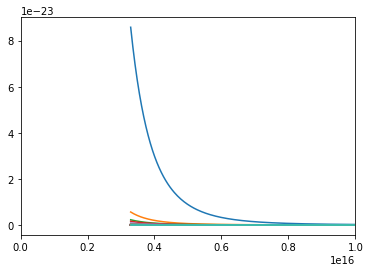

In [27]:
for i in range(len(sight)):
    r = np.linalg.norm(sight[i] - start[19])/m
    Distance.append(r)
    #We will store the distance to the cells 
    r = r * u.Mpc 
    r = r.to(u.cm)

    time = np.linspace(3288465369235488.5, 3288465369235488.5e+2, 10000)

    plt.plot(time, integrand(time, r.value))
    plt.xlim(0, 1e16)

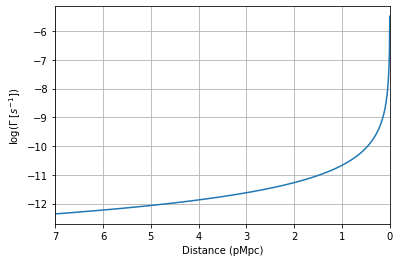

In [26]:
#Here we will plot Gamma as a function of distance from the quasar
plt.plot(Distance, np.log10(Gamma))
plt.xlim([7, 0])
plt.xlabel('Distance (pMpc)')
plt.ylabel('log$(\Gamma\ [s^{-1}])$')
plt.grid()

In [15]:
alpha = exp(-28.6130338 - 0.72411256*ln(temp.value) 
                - 2.02604473*10**(-2)*ln(temp.value)**2 
                - 2.38086188*10**(-3)*ln(temp.value)**3
                - 3.21260521*10**(-4)*ln(temp.value)**4
                - 1.42150291*10**(-5)*ln(temp.value)**5
                + 4.98910892*10**(-6)*ln(temp.value)**6
                + 5.75561414*10**(-7)*ln(temp.value)**7
                - 1.85676704*10**(-8)* ln(temp.value)**8
                - 3.07113524*10**(-9)*ln(temp.value)**9)* (u.cm)**3 * (u.s)**(-1)
#Throughout this section, alpha will represent the recombination rate and it has units of cm^3/s
print(alpha)

4.16987566019461e-13 cm3 / s


In [28]:
print(Distance[300])
#Choosing a random value of gamma along the LOS that fits the values we expect it to near the quasar

2.104106402994634


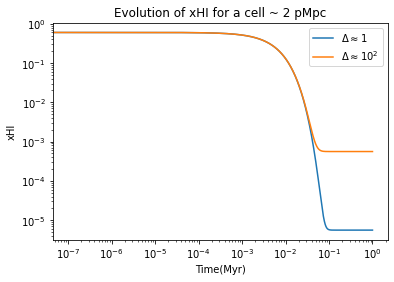

In [29]:
#Solving the photoionization equation for some randomly chosen values of xHI and n_e
import scipy
xHI_0 = 0.6
n = np.mean(nH) * (u.cm)**(-3)


def model(x, t):
    """ 
    A function to model the ode that we intend to solve
    Parameters
    ----------
    x: float64, represents the neutral hydrogen fraction
    t: float64, represents the time
    """
    dxdt = - Gamma[300] * x + alpha.value * n.value*(1-x)**2
    return np.float64(dxdt)

t = np.linspace(0, 3.15576e+13, 10000000)
#We will work in a time space of 50 seconds. Where we take the initial state of the system to start at t = 0

sol = scipy.integrate.odeint(model, xHI_0 , t)
#Solving the ODE

plt.plot(t/3.15576e+13, sol, label ='$\Delta \\approx 1 $')
plt.xlabel('Time(Myr)')
plt.ylabel('xHI')
plt.yscale('log')

xHI_0 = 0.6
n = np.mean(nH)*100 *(u.cm)**(-3)

t = np.linspace(0, 3.15576e+13, 10000000)
#We will work in a time space of 50 seconds. Where we take the initial state of the system to start at t = 0

sol = scipy.integrate.odeint(model, xHI_0 , t)
#Solving the ODE

plt.plot(t/3.15576e+13, sol, label = '$\Delta \\approx 10^2$')
plt.xlabel('Time(Myr)')
plt.ylabel('xHI')
plt.yscale('log')
plt.xscale("log")
plt.title('Evolution of xHI for a cell ~ 2 pMpc')
plt.legend()

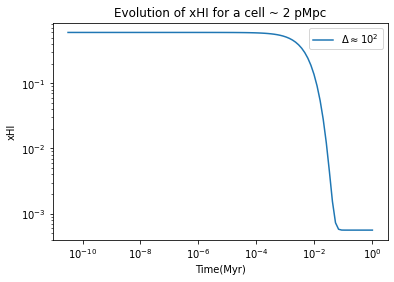

In [30]:

t = np.logspace(3, 13.5, 100)
#We will work in a time space of 50 seconds. Where we take the initial state of the system to start at t = 0

sol = scipy.integrate.odeint(model, xHI_0 , t)
#Solving the ODE

plt.plot(t/3.15576e+13, sol, label = '$\Delta \\approx 10^2$')
plt.xlabel('Time(Myr)')
plt.ylabel('xHI')
plt.yscale('log')
plt.xscale("log")
plt.title('Evolution of xHI for a cell ~ 2 pMpc')
plt.legend()

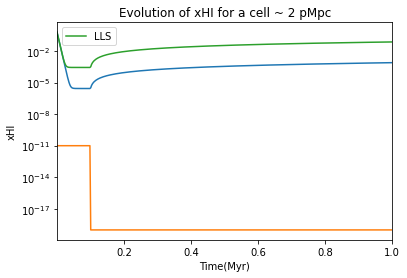

In [95]:
# Here, we will test our results with a light curve that is turned on for a brief period but turns off for the rest of 
# the timescale
t = np.logspace(3, 13.5, 1000)

gamma = lambda t: np.piecewise(t, [t < 3.15576e+13/10, t>= 3.15576e+13/10], [10**(-11), 10**(-19)])

def model(x, t):
    """ 
    A function to model the ode that we intend to solve
    Parameters
    ----------
    x: float64, represents the neutral hydrogen fraction
    t: float64, represents the time
    """
    dxdt = - gamma(t) * x + alpha.value * n.value*(1-x)**2
    return np.float64(dxdt)


xHI_0 = 0.6
n =  np.mean(nH) * (u.cm)**(-3)
sol = scipy.integrate.odeint(model, xHI_0 , t)
plt.plot(t/3.15576e+13, sol)
plt.plot(t/3.15576e+13, gamma(t))

xHI_0 = 0.6
n =  np.mean(nH) *100 * (u.cm)**(-3)
sol = scipy.integrate.odeint(model, xHI_0 , t)
plt.plot(t/3.15576e+13, sol, label ='LLS')

plt.xlabel('Time(Myr)')
plt.ylabel('xHI')
plt.yscale('log')

plt.xlim(1e-3,1)
plt.title('Evolution of xHI for a cell ~ 2 pMpc')
plt.legend()

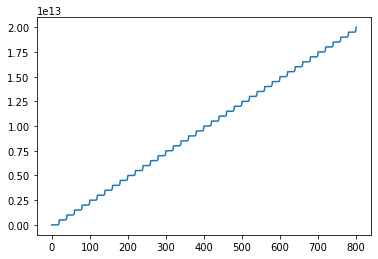

In [28]:
# Here, we will test the evolution of the neutral hydrogen fraction for various duty cycles. We will consider the quasar period to be 0.1 Myr
# The duty cyles used are 
import scipy
from scipy import signal


fduties = [0.2, 0.6, 0.8]

t=[0]
for i in range(40):
    t+=list(np.logspace(3,np.log10(0.5e+12),20)+t[-1])
t=np.array(t)
plt.plot(t)
 

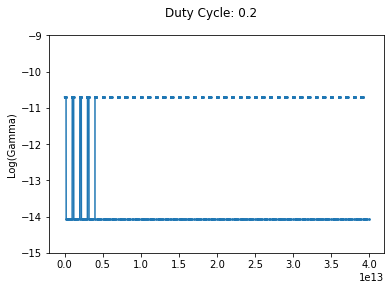

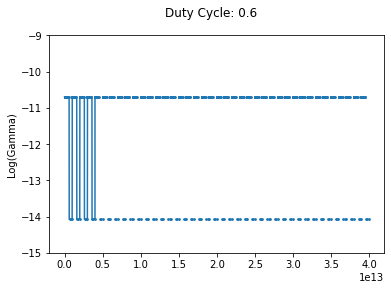

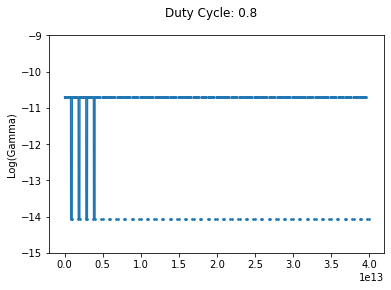

In [53]:
tsample=[0]
for i in range(40):
    tsample+=list(np.logspace(3,np.log10(0.99e+12),100)+i*1e+12)
tsample=np.array(tsample)


def model(x, t):
    dxdt = - gamma(t) * x + alpha.value * n.value*(1-x)**2
    return np.float64(dxdt)

xHI_0 = 0.6


t=np.linspace(0,4e12,2000)
for fduty in fduties:
    gamma = lambda t: 10**(-11)*signal.square(t * 2 * np.pi/((1e+12)), duty = fduty) + 8.92*10**(-11.95)
    fig, ax = plt.subplots(1,1)
    ax.plot(t, np.log10(gamma(t)))
    ax.scatter(tsample,np.log10(gamma(tsample)),s=3)
    ax.set_ylabel('Log(Gamma)')
    ax.set_ylim([-15, -9])

    fig.suptitle('Duty Cycle: ' + str(fduty))
    plt.show()

[0.00000000e+00 1.00000000e+05 1.01625487e+05 ... 9.95858343e+12
 9.97416508e+12 9.99000000e+12]


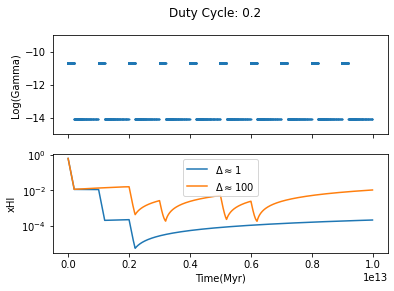

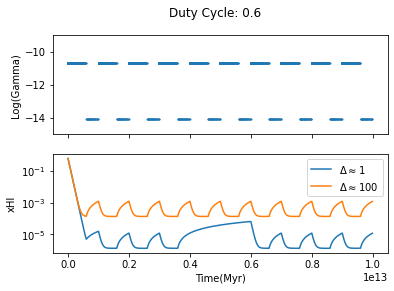

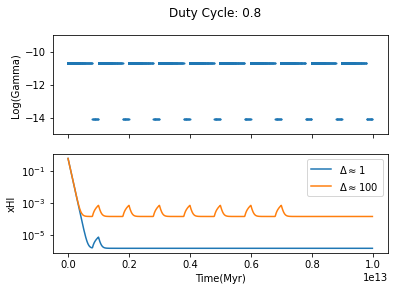

In [193]:

tsample=[0]
for i in range(10):
    tsample+=list(np.logspace(5,np.log10(0.99e+12),1000)+i*1e+12)
tsample=np.array(tsample)


t=np.copy(tsample)   
print(t)
def model(x, t):
    dxdt = - gamma(t) * x + alpha.value * n.value*(1-x)**2
    return np.float64(dxdt)

xHI_0 = 0.6

for fduty in fduties:
    gamma = lambda t: 10**(-11)*signal.square(2 * np.pi * t/(1e+12), duty = fduty) + 8.92*10**(-11.95)

    n =  np.mean(nH) * (u.cm)**(-3)
    sol1 = scipy.integrate.odeint(model, xHI_0, t, rtol = 10**(-20))
    fig, ax = plt.subplots(2,1)
    ax[0].scatter(t, np.log10(gamma(t)),s=1)


    n =  np.mean(nH) *100 * (u.cm)**(-3)
    sol2 = scipy.integrate.odeint(model, xHI_0, t, rtol = 10**(-20))



    
    
    ax[1].plot(t, (sol1), label = '$\Delta \\approx 1$')
    ax[1].plot(t, (sol2), label = '$\Delta \\approx 100$')
    ax[0].set_ylabel('Log(Gamma)')
    ax[0].set_xticklabels([])
    ax[0].set_ylim([-15, -9])
    ax[1].set_ylabel('xHI')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Time(Myr)')
    ax[1].legend()
    fig.suptitle('Duty Cycle: ' + str(fduty))
    plt.show()

In [55]:
alph_val = alpha.value
print(alph_val)

#We will solve the photoionization equation for 1 cell in 10 random sight-lines
for j in range(10):
    direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
    direction = direction/(np.linalg.norm(direction))
    #Generating a random direction for the sight-line. Observe that the distribution of the direction
    #vector is not spherically symmetric 
    lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
    #Obtaining the information about the cells along the line of sight
    
    #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving
    #Gamma to have units of s^(-1) as desired. 

    
    n_e = np.zeros(len(sight))
    #tau_sight = np.zeros(len(sight))
    for i in range (len(sight)):
        n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
        #Here, we obtain the number density of electrons along the line of sight
        #tau_sight[i] = dT[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
    
    # We will only solve the photoionization equation for the cell that is closest to the quasar
       # We will only solve the photoionization equation for the cell that is closest to the quasar
    
    for k in range(1):
        n = n_e[300]
        r = np.linalg.norm(sight[300] - start[19])/m
        r = r * u.Mpc 
        r = r.to(u.cm)
        #tau = tau_sight[k]
        
        #gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]


        def model(x, t):
            dxdt = - gamma * x + alph_val * n*(1-x)**2
            return np.float64(dxdt)
        for cnt_rnd in range(6):
            gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]
            rnd_num1 = 16
            for l in range(6):

                def model(x, t):
                    dxdt = - gamma * x + alph_val * n*(1-x)**2
                    return np.float64(dxdt)
                t = np.linspace(0, 1e14, 10000000)
    
                sol = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]] , t)
                #print(dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*(1-x(t))**2, x(t)))
                rnd_num2 = 16
                

                plt.plot(t/3.15576e+13, sol, label = "Gamma = " + str((round(gamma, rnd_num2))) + " Alpha = " + str(round(alph_val, rnd_num1) )  )
                plt.legend()
                plt.yscale('log')
                plt.ylabel('xHI')
                plt.xlabel('Time(Myr)')
                gamma = gamma * 2
            plt.show()
            alph_val = alph_val * 2

4.16987566019461e-13


/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [319]:
# Here, we will repeat the same procedure as above for a couuple of sight lines and different values of gamma
# and alpha

'''
#We will solve the photoionization equation for 1 cell in 10 random sight-lines
for j in range(10):
    print("here")
    direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
    direction = direction/(np.linalg.norm(direction))
    #Generating a random direction for the sight-line. Observe that the distribution of the direction
    #vector is not spherically symmetric 
    
    lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
    #Obtaining the information about the cells along the line of sight
    
    #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving
    #Gamma to have units of s^(-1) as desired. 

    
    n_e = np.zeros(len(sight))
    #tau_sight = np.zeros(len(sight))
    for i in range (len(sight)):
        n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
        #Here, we obtain the number density of electrons along the line of sight
        #tau_sight[i] = dT[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
    
    # We will only solve the photoionization equation for the cell that is closest to the quasar
    
    for k in range(1):
        n = n_e[300]
        r = np.linalg.norm(sight[300] - start[19])/m
        r = r * u.Mpc 
        r = r.to(u.cm)
        #tau = tau_sight[k]
        
        #gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]


        def model(x, t):
            dxdt = - gamma * x + alph_val * n*(1-x)**2
            return np.float64(dxdt)
 
        t = np.linspace(0, 0.2e15, 10000000)

        sol = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]] , t)
        #print(dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*(1-x(t))**2, x(t)))
        rnd_num2 = 16
        


        
        
        plt.plot(t, sol, label = "Gamma = " + str((round(gamma, rnd_num2))) + " Alpha = " + str(round(alph_val, rnd_num1) )  )
        plt.yscale('log')
        plt.show()
 
        print('here')
        for cnt_rnd in range(1):
            print(cnt_rnd)
            gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]
            print(cnt_rnd)
       
            plt.figure(figsize = (20, 10))
            rnd_num1 = 3
            if cnt_rnd == 0 and round(alph_val, 12)!= 1:
                rnd_num1 = 16
            
            for l in range(6):

                def model(x, t):
                    dxdt = - gamma * x + alph_val * n*(1-x)**2
                    return np.float64(dxdt)
                t = np.linspace(0, 1e14 10000000)
    
                sol = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]] , t)
                #print(dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*(1-x(t))**2, x(t)))
                rnd_num2 = 3
                
                if l == 0:
                    rnd_num2 = 16

                plt.plot(t, sol, label = "Gamma = " + str((round(gamma, rnd_num2))) + " Alpha = " + str(round(alph_val, rnd_num1) )  )
                plt.legend()
                plt.yscale('log')
                gamma += 0.2 
            plt.show()
            alph_val += 0.2
'''       

'\n#We will solve the photoionization equation for 1 cell in 10 random sight-lines\nfor j in range(10):\n    print("here")\n    direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))\n    direction = direction/(np.linalg.norm(direction))\n    #Generating a random direction for the sight-line. Observe that the distribution of the direction\n    #vector is not spherically symmetric \n    \n    lls, lls_trunc, sight, new_sight = lyman(start[19], direction)\n    #Obtaining the information about the cells along the line of sight\n    \n    #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving\n    #Gamma to have units of s^(-1) as desired. \n\n    \n    n_e = np.zeros(len(sight))\n    #tau_sight = np.zeros(len(sight))\n    for i in range (len(sight)):\n        n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]

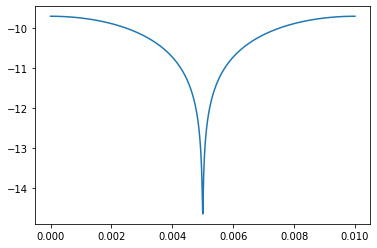

In [471]:
t = np.linspace(0, 3.15576e+11, 10000000)

gamma =  lambda t : 0.0000000001*np.cos(t*(2*np.pi)/3.15576e+11) + 10**(-9.99999)
plt.plot(t/3.15576e+13, np.log10(gamma(t)))


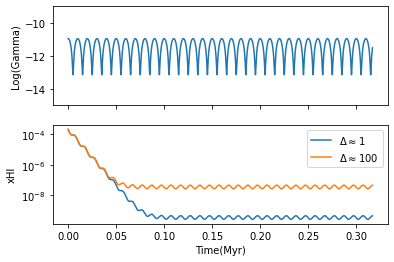

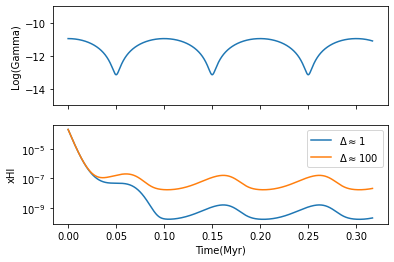

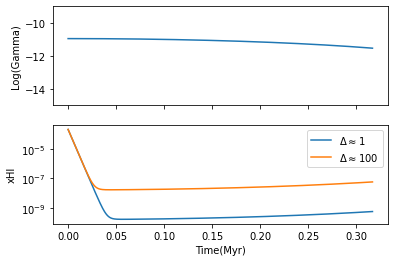

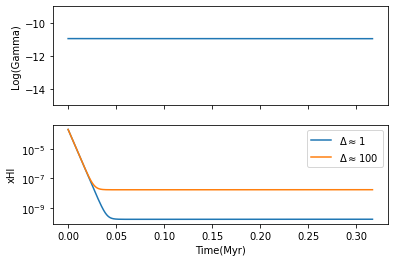

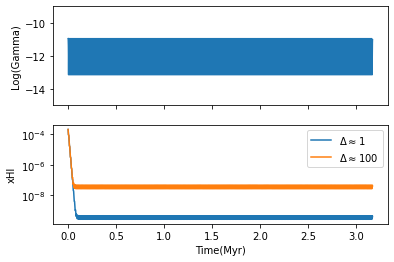

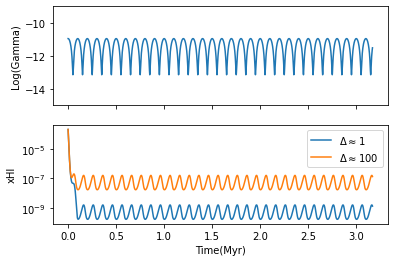

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


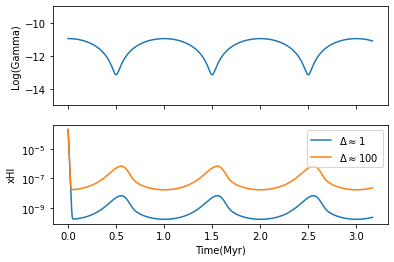

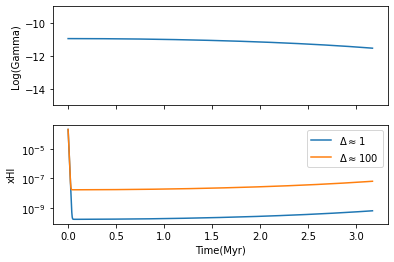

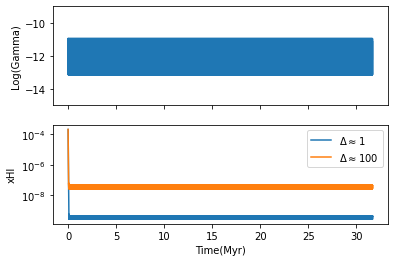

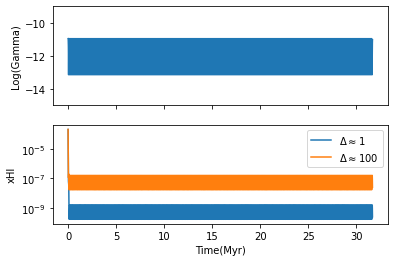

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


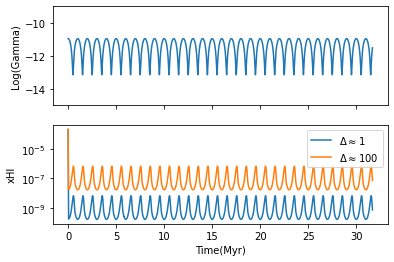

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


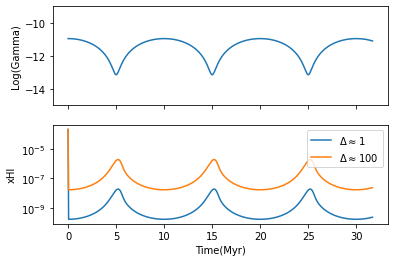

In [52]:
#Here, we will solve the photoionization equation for Gamma that is periodic. 

direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
direction = direction/(np.linalg.norm(direction))
#It was 13 and 16
for BIG_CNT in range(13,16): 
    num = 3.15576e+11
    for big_cnt in range(4):
        gamma =  lambda t : (0.00000000009*np.cos(t*(2*np.pi)/num) + 10**(-10.036))**(1.125)
        #It was np.cos(t*(2*np.pi)/num)
        alph_val = alpha.value

        for j in range(1):
            #Generating a random direction for the sight-line. Observe that the distribution of the direction
            #vector is not spherically symmetric 
            lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
            #Obtaining the information about the cells along the line of sight

            #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving
            #Gamma to have units of s^(-1) as desired. 


            n_e = np.zeros(len(sight))
            #tau_sight = np.zeros(len(sight))
            for i in range (len(sight)):
                n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
                #Here, we obtain the number density of electrons along the line of sight
                #tau_sight[i] = dT[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])

            # We will only solve the photoionization equation for the cell that is closest to the quasar
               # We will only solve the photoionization equation for the cell that is closest to the quasar

            for k in range(1):
                n = n_e[300]
                r = np.linalg.norm(sight[300] - start[19])/m
                r = r * u.Mpc 
                r = r.to(u.cm)
                #tau = tau_sight[k]

                #gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]
                def model(x, t):
                    dxdt = - gamma(t) * x + alph_val * n*(1-x)**2
                    return np.float64(dxdt)
                t = np.linspace(0, 10**(BIG_CNT), 10000000)
                #2e6
                if big_cnt>1:
                    t = np.linspace(0, 10**(BIG_CNT), 10000000)
                    #1e7
                if big_cnt >2:
                    t = np.linspace(0, 10**(BIG_CNT), 10000000)

                sol1 = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]], t, rtol = 10**(-12), atol = 10**(-12)) 
                n = n* 10**(2)
                sol2 = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]], t, rtol = 10**(-12), atol = 10**(-12))

                fig, ax = plt.subplots(2,1)
                ax[0].plot(t/3.15576e+13, np.log10(gamma(t)))
                ax[1].plot(t/3.15576e+13, (sol1), label = '$\Delta \\approx 1$')
                ax[1].plot(t/3.15576e+13, (sol2), label = '$\Delta \\approx 100$')
                ax[0].set_ylabel('Log(Gamma)')
                ax[0].set_xticklabels([])
                ax[0].set_ylim([-15, -9])
                ax[1].set_ylabel('xHI')
                ax[1].set_yscale('log')
                ax[1].set_xlabel('Time(Myr)')
                ax[1].legend()
                plt.show()
        num = num*10 

In [ ]:
gamma = lambda t 

In [53]:
print(gamma)
print(alpha)

<function <lambda> at 0x7f773f1100d0>
4.16987566019461e-13 cm3 / s


## Using results from the 1DRT code 

7.287774e-10
7.118901e-10
5.691822e-10
7.261101e-10
6.692914e-10
4.39083e-10


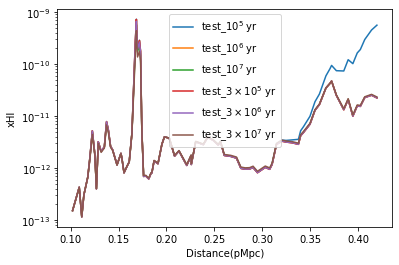

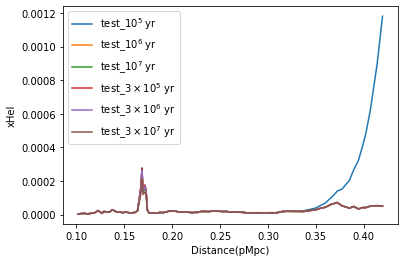

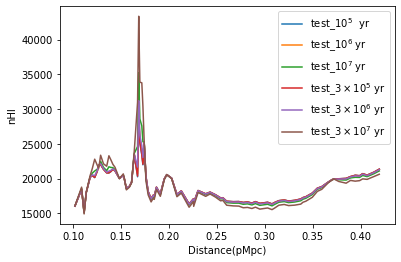

In [43]:
# First, we will be testing the case where the light curve is constant

#Importing glob to read the files
from glob import glob

#Loading the data 
fpath = "/fs/lustre/cita/akhadir/run_sims/"

files = glob(fpath + '*test*.txt')
files.sort()

tot_thick = []
tot_nH = []
tot_nHe = []
tot_xHI = []

for i in range(len(files)):
    file = files[i]
    f_dist, f_thick, f_nH, f_nHe, f_xHI = np.loadtxt(file, unpack = True, usecols = (0, 1, 2, 3, 4))
    tot_thick.extend(np.ndarray.tolist(f_thick))
    tot_nH.extend(np.ndarray.tolist(f_nH))
    tot_nHe.extend(np.ndarray.tolist(f_nHe))
    tot_xHI.extend(np.ndarray.tolist(f_xHI))
    print(max(f_nH))
    

for i in range(int(len(tot_nH)/len(f_nH))):
    t = "test_"
    if i == 0:
        l = t + "$10^5$ yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^7$ yr"
    plt.plot(f_dist, tot_nH[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.xlabel('Distance(pMpc)')
    plt.ylabel('xHI')
    plt.yscale('log')
plt.show()

for i in range(int(len(tot_nH)/len(f_nH))):
    if i == 0:
        l = t + "$10^5$ yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^7$ yr"
    plt.plot(f_dist, tot_nHe[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.xlabel('Distance(pMpc)')
    plt.ylabel('xHeI')
plt.show()

for i in range(int(len(tot_nH)/len(f_nH))):
    if i == 0:
        l = t + "$10^5$  yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^7$ yr"
    plt.plot(f_dist, tot_xHI[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.xlabel('Distance(pMpc)')
    plt.ylabel('nHI')
plt.show()

0.5970204
0.5970584
1.381287e-09
0.5970235
0.003017301
5.903016e-10


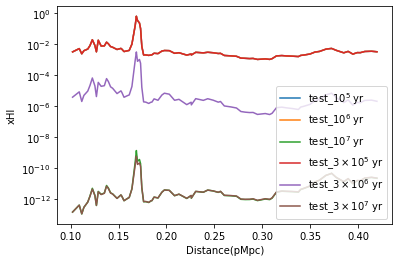

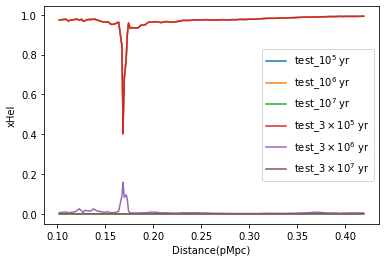

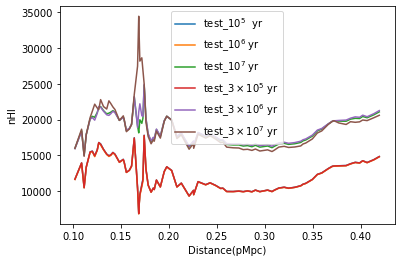

In [44]:
# Now, we will be testing the case in which the light curve is periodic

#Loading the data 
fpath = "/fs/lustre/cita/akhadir/run_sims/LightCurve/"

files = glob(fpath + '*test*.txt')
files.sort()

tot_thick = []
tot_nH = []
tot_nHe = []
tot_xHI = []

for i in range(len(files)):
    file = files[i]
    f_dist, f_thick, f_nH, f_nHe, f_xHI = np.loadtxt(file, unpack = True, usecols = (0, 1, 2, 3, 4))
    tot_thick.extend(np.ndarray.tolist(f_thick))
    tot_nH.extend(np.ndarray.tolist(f_nH))
    tot_nHe.extend(np.ndarray.tolist(f_nHe))
    tot_xHI.extend(np.ndarray.tolist(f_xHI))
    print(max(f_nH))
    

for i in range(int(len(tot_nH)/len(f_nH))):
    t = "test_"
    if i == 0:
        l = t + "$10^5$ yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^7$ yr"
    plt.plot(f_dist, tot_nH[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.xlabel('Distance(pMpc)')
    plt.ylabel('xHI')
    plt.yscale('log')
plt.show()

for i in range(int(len(tot_nH)/len(f_nH))):
    if i == 0:
        l = t + "$10^5$ yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^7$ yr"
    plt.plot(f_dist, tot_nHe[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.xlabel('Distance(pMpc)')
    plt.ylabel('xHeI')
plt.show()

for i in range(int(len(tot_nH)/len(f_nH))):
    if i == 0:
        l = t + "$10^5$  yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^7$ yr"
    plt.plot(f_dist, tot_xHI[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.xlabel('Distance(pMpc)')
    plt.ylabel('nHI')
plt.show()

In [21]:
#Function to choose a Lymann Limit system given a LOS 
length = 50*m

def lyman(start, direction):
    ''' A function to select a Lyman Limit System given a start point and an end point
    Parameters
    __________
    start : contains the positional cooridinates of the start point
           numpy array
    end : contains the positional coordinates of the end point
           numpy array
    '''
    start = (start)
    end = (start + length*direction)
    t = np.linspace(0, 1, 1000)
    sight, new_sight = np.vstack((np.linspace(start[0], end[0], 1000), 
                          np.linspace(start[1], end[1], 1000), 
                          np.linspace(start[2], end[2], 1000))).T, np.vstack((np.linspace(start[0], end[0], 1000), 
                          np.linspace(start[1], end[1], 1000), 
                          np.linspace(start[2], end[2], 1000))).T
    LLS = np.array([])
    LLS_trunc = np.array([])
   

    for i in range(len(t)):
        while new_sight[i][0]<0:
            new_sight[i][0] = 1023 + new_sight[i][0]
        
        while new_sight[i][1]<0:
            new_sight[i][1] = 1023 + new_sight[i][1]
            
        while new_sight[i][2]<0:
            new_sight[i][2] = 1023 + new_sight[i][2]
            
   
    
        while new_sight[i][0]>1023:
            new_sight[i][0] = new_sight[i][0] - 1023
        
        while new_sight[i][1]>1023:
            new_sight[i][1] = new_sight[i][1] - 1023
        
        while new_sight[i][2]>1023:
            new_sight[i][2] = new_sight[i][2] - 1023
            
       
    sight = np.floor(sight)
    sight = sight.astype(int)
    new_sight = np.floor(new_sight)
    new_sight = new_sight.astype(int)
    density = np.zeros(len(t))
   
    for i in range(len(t)):
        density[i] = delta[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]]
        if density[i]>10**2 and sight[i].any()!= LLS.any():
            LLS = np.append(LLS, np.ndarray.tolist(sight[i]))
            LLS_trunc = np.append(LLS_trunc, np.ndarray.tolist(new_sight[i]))
    return LLS, LLS_trunc, sight, new_sight
    

In [48]:
# Here, we will calculate the spectrum as it travels through a LOS

import sys
from sympy import *
sys.path.insert(0, '/fs/lustre/cita/hqchen/data/scripts/')

from ifritfunc import *

# Now that the relevant modules have been imported, we will prepare the required parameters for the calc_spec function
vspec_out = np.linspace(-1000, 8000, 1000)
phi = np.random.uniform(0,2*pi)
costheta = np.random.uniform(-1,1)
theta = acos( costheta )

posx =  sin( theta) * cos( phi )
posy =  sin( theta) * sin( phi )
posz =  cos( theta )

direction = np.asarray((posx, posy, posz), dtype ='float64')

lls, lls_trunc, sight, new_sight = lyman(start[19], direction)

pos_arr = np.linalg.norm((sight - start[19]), axis = 1)/m

nHI_spec = np.zeros(len(sight))
T_spec = np.zeros(len(sight))

for i in range(len(sight)):
    nHI_spec[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value
    T_spec[i] = T[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]]

vlos = np.zeros(len(sight))

dR = np.zeros(len(sight))

dR[0] = np.linalg.norm(sight[1] -sight[0])/m
dR[-1] = np.linalg.norm(sight[-1] - sight[-2])/m
for i in range(1, (len(sight)-1)):
    pt1 = sight[i-1] + direction*np.linalg.norm(sight[i] - sight[i-1])/2
    pt2 = sight[i] + direction*np.linalg.norm(sight[i+1]-sight[i])/2
    
    dR[i] = np.linalg.norm(pt1-pt2)/m
    
Hz = cosmo.H(6).value

calculated_spec = calc_spec(vspec_out, pos_arr*.1401, nHI_spec, vlos, T_spec, dR, Hz)

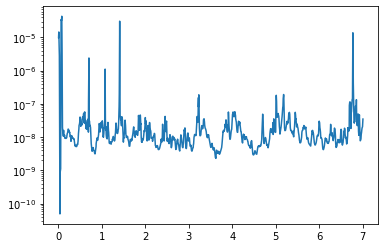

In [49]:
plt.plot(pos_arr*(.1401), nHI_spec)
plt.yscale("log")

In [50]:
calculated_spec = calc_spec(vspec_out, pos_arr*.1401, nHI_spec*0.01, vlos, T_spec, dR, Hz)

Text(0, 0.5, 'Transmitted Flux')

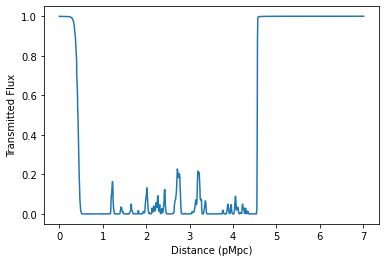

In [69]:
plt.plot(pos_arr*.1401, calculated_spec)
plt.xlabel('Distance (pMpc)')
plt.ylabel('Transmitted Flux')

In [29]:
vspec_out
#Run C code and get evolution of neutral hydrogen fraction with N_dot 10^{56-58}. 3 \times 10^{57}, 3\times 10^{56}, 3\times10^{57}

# Make plots of evolving xHI using your simple python code for cells that have high nHI 

# Change the y-axis in the blue histogram of the LLS to frequency/sightline. 

 
# Find the cells that have density contrast greater than 100 for each sightline. Plot that as a histogram with percentage of sightlines on y axis with bins of 10 cMPC



array([-345, 5716, 4052, 1989, -577, 6037, 7207, 1241,  830, 4673])

In [242]:
print(np.arange(100))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
